<a href="https://colab.research.google.com/github/Darrystic/AI-Tools-Assignment/blob/main/iris_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# notebooks/01_iris_decision_tree.ipynb

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
iris.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  data/iris.zip
  inflating: data/Iris.csv           
  inflating: data/database.sqlite    
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null  

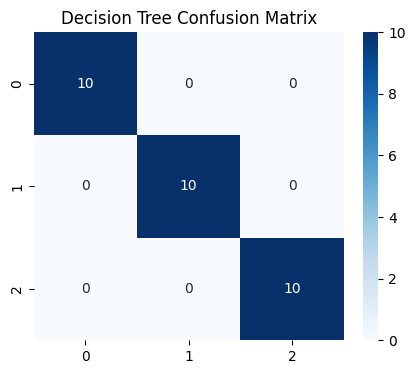

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- Id <= 100.50
|   |   |--- class: Iris-versicolor
|   |--- Id >  100.50
|   |   |--- class: Iris-virginica



In [8]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === Step 1: Load dataset ===
!mkdir -p ~/.kaggle
!echo '{"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_API_KEY"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Create data folder and download dataset
!mkdir -p data
!kaggle datasets download -d uciml/iris -p data
!unzip -o data/iris.zip -d data

iris_path = "data/Iris.csv"
if not os.path.exists(iris_path):
    raise FileNotFoundError("Please download iris.csv from Kaggle and place it under data/ folder.")

iris_df = pd.read_csv(iris_path)

# === Step 2: Inspect and preprocess ===
print(iris_df.head())
print(iris_df.info())

# Check for missing values
if iris_df.isnull().values.any():
    iris_df = iris_df.dropna()

# Encode target column if it’s string labels
X = iris_df.drop(columns=["Species"])
y = iris_df["Species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Step 3: Model training ===
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

# === Step 4: Evaluation ===
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree Confusion Matrix")

# Ensure the 'figures' folder exists before saving
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/iris_confusion_matrix.png", dpi=150)
plt.show()


# Export readable tree
print(export_text(clf, feature_names=list(X.columns)))
